# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Object-oriented programming in Python
Week 9 | Lesson 1.1

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Describe object-oriented programming
- Create class objects in Python

# Object Oriented Programming
Object oriented programming is a style of programming where data and the operations that manipulate them are organized into classes and methods. 

What are classes and methods? I'm glad you asked. 

# Classes
A ```class``` is a little like a function. They let you define a general case to repeat operations you've written. 

The difference is a ```class``` can hold both variables and functions that relate to each other. These are called attributes. 

Let's start by defining an empty class called ```Point```


In [1]:
class Point(object):
    '''Sample DocString'''


In [2]:
Point

__main__.Point

Let's create a copy of Point called version1. This is called an instance of the Point class

In [3]:
version1 = Point()

## Variables
We can define variables within the class that don't apply to the general case:

In [4]:
version1.x = 4
version1.y = 7
version1.x

4

In [5]:
dir(version1)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'x',
 'y']

In [6]:
dir(Point)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [7]:
# Create an instance of Point
p=Point()

In [8]:
# Add in a few variables. Print them out
p.red='red'
p._3=3
print p.red
print p._3


red
3


## Methods
Methods are functions that are defined within a class. 

In [9]:
class Time():
    def print_time(self):
        print '%.2d:%.2d:%.2d' % (self.hour, self.minute, self.second)

Calling 'self' tells the method to refer to the variables and other methods within the class instance. 

In [10]:
morning = Time() #define the class
morning.hour = 9 #set the attributes
morning.minute = 15
morning.second = 0
morning.print_time() #call the method

09:15:00


In [11]:
# Create an instance called afternoon and assign times to it
afternoon=Time()
afternoon.hour=12
afternoon.minute=30
afternoon.second=0

In [12]:
# Print out the time in afternoon
afternoon.print_time()

12:30:00


Let's add in a new method that converts time to integer:

In [13]:
class Time():
    def print_time(self):
        print '%.2d:%.2d:%.2d' % (self.hour, self.minute, self.second)
        
    def time_to_int(self):
        '''Returns the current time in seconds'''
        minutes = self.hour * 60 + self.minute
        return minutes * 60 + self.second
    

Again, note that 'self.hour' refers to the value of hour within the class

In [14]:
morning = Time() #define the class
morning.hour = 9 #set the attributes
morning.minute = 15
morning.second = 0
morning.time_to_int() #call the method

33300

In [15]:
afternoon=Time()
afternoon.hour=12
afternoon.minute=30
afternoon.second=0
afternoon.time_to_int()

45000

Modify the variables and run the functions again:

In [16]:
morning.hour += 1
morning.time_to_int()

36900

In [17]:
# Reinstantiate afternoon. 


# Convert the time in afternoon to an integer


# Change the values in afternoon. Convert that to an integer. 



`time_to_int()` is called a 'pure' function because it returns a new value. You can also write 'modifier' functions that modify your attributes in place (imagine a funciton that sets a new value for self.seconds).

Add a modifier method `int_to_time()` that takes in a value for seconds and resets the hour, minute and second values to that value. 

In [18]:
class Time():
    def print_time(self):
        print '%.2d:%.2d:%.2d' % (self.hour, self.minute, self.second)
        
    def time_to_int(self):
        '''Returns the current time in seconds'''
        minutes = self.hour * 60 + self.minute
        return minutes * 60 + self.second
    
    def int_to_time(self, seconds):
        '''Resets the values for hour, minute and second to a new 
        value, given by a number of seconds
        '''
        self.second=seconds%60
        minutes=(seconds-self.second)/60
        self.minute=minutes%60
        hours=(minutes-self.minute)/60
        self.hour=hours
        
        
        

In [19]:
morning = Time() #define the class
morning.hour = 9 #set the attributes
morning.minute = 15
morning.second = 0
morning.print_time() #call the method
print morning.time_to_int()

09:15:00
33300


In [20]:
morning.int_to_time(33300) # A random example
morning.print_time()

09:15:00


### Interacting classes
This is a little complicated, but we can write a method that compares two instances of the same class. 

Here's a method `is_after()` which checks if one Time class is before another: 

In [21]:
class Time():
    def print_time(self):
        print '%.2d:%.2d:%.2d' % (self.hour, self.minute, self.second)
        
    def time_to_int(self):
        '''Returns the current time in seconds'''
        minutes = self.hour * 60 + self.minute
        return minutes * 60 + self.second
    
    def int_to_time(self, seconds):
        '''Resets the values for hour, minute and second to a new 
        value, given by a number of seconds
        '''
        self.hour, self.minute = divmod(seconds, 3600)
        self.minute, self.second = divmod(self.minute, 60)
    
    def is_after(self, other):
        '''Compares two time classes'''
        return self.time_to_int() > other.time_to_int()

In [22]:
morning = Time() #define the class
morning.hour = 9 #set the attributes
morning.minute = 15
morning.second = 0
morning.print_time() #call the method

09:15:00


In [23]:
afternoon = Time() #define another class
afternoon.hour = 16 #set the attributes
afternoon.minute = 45
afternoon.second = 0
afternoon.print_time() #call the method

16:45:00


In [24]:
morning.is_after(afternoon)

False

In [25]:
afternoon.is_after(morning)

True

`isinstance` is a built in function that checks if an instance belongs to a class:

In [26]:
isinstance(morning, Time)

True

To be thorough, you could rewrite that last method to include a check for AttributeError:
```python

def is_after(self, other):
    '''Compares two time classes'''
    if isinstance(other, Time):
        return self.time_to_int() > other.time_to_int()
```

## Built in methods:  `__init__`
Python classes come with some built in methods that do specific things when invoked. 

`__init__` initializes variables that you pass in as arguments 

In [27]:
class Time():
    def __init__(self, hour=0, minute=0, second=0):
        self.hour = hour
        self.minute = minute
        self.second = second
    def __i__(self, hour=5, minute=50, second=50):
        self.hour = 5
        self.minute = 50
        self.second = 50
    
    def print_time(self):
        print '%.2d:%.2d:%.2d' % (self.hour, self.minute, self.second)
        
    def time_to_int(self):
        '''Returns the current time in seconds'''
        minutes = self.hour * 60 + self.minute
        return minutes * 60 + self.second
    
    def int_to_time(self, seconds):
        '''Resets the values for hour, minute and second to a new 
        value, given by a number of seconds
        '''
        self.hour, self.minute = divmod(seconds, 3600)
        self.minute, self.second = divmod(self.minute, 60)
    
    def is_after(self, other):
        '''Compares two time classes'''
        if isinstance(other, Time):
            return self.time_to_int() > other.time_to_int()

In [28]:
#print Time.__init__
a = Time()
print a.hour
a.__i__()
a.hour

0


5

In [29]:
morning = Time(9, 15, 0) #variables are defined when we invoke the class!
morning.print_time()

09:15:00


In [30]:
# Create afternoon, passing in times as arguments



In [31]:
morning.is_after(a)

True

### Built in method 2: `__str__`
Here's one more. You can look up more built in methods on your own after this

`__str__` does the same thing we told `print_time()` to do. Swap out `print` for `return`. The difference is now `__str__` does some Python magic behind the scenes so we can call `print` on the class directly. 

In [32]:
class Time():
    def __init__(self, hour=0, minute=0, second=0):
        self.hour = hour
        self.minute = minute
        self.second = second
    
    def __str__(self):
        return '%.2d:%.2d:%.2d' % (self.hour, self.minute, self.second)
        
    def time_to_int(self):
        '''Returns the current time in seconds'''
        minutes = self.hour * 60 + self.minute
        return minutes * 60 + self.second
    
    def int_to_time(self, seconds):
        '''Resets the values for hour, minute and second to a new 
        value, given by a number of seconds
        '''
        self.hour, self.minute = divmod(seconds, 3600)
        self.minute, self.second = divmod(self.minute, 60)
    
    def is_after(self, other):
        '''Compares two time classes'''
        if isinstance(other, Time):
            return self.time_to_int() > other.time_to_int()

In [33]:
morning = Time(9, 15, 0)
print morning

09:15:00


In [34]:
# Print afternoon



#### Practice:
Add a method called `increment(n)` below that increases the value of time by n seconds. 

In [35]:
class Time():
    def __init__(self, hour=0, minute=0, second=0):
        self.hour = hour
        self.minute = minute
        self.second = second
    
    def __str__(self):
        return '%.2d:%.2d:%.2d' % (self.hour, self.minute, self.second)
        
    def time_to_int(self):
        '''Returns the current time in seconds'''
        minutes = self.hour * 60 + self.minute
        return minutes * 60 + self.second
    
    def int_to_time(self, seconds):
        '''Resets the values for hour, minute and second to a new 
        value, given by a number of seconds
        '''
        self.hour, self.minute = divmod(seconds, 3600)
        self.minute, self.second = divmod(self.minute, 60)
    
    def is_after(self, other):
        '''Compares two time classes'''
        if isinstance(other, Time):
            return self.time_to_int() > other.time_to_int()
        
    # YOUR CODE HERE
    def increment(self,minute=1,second=0,hour=0):
        self.minute+=minute
        self.hour+=hour
        self.second+=second
        self.int_to_time(self.time_to_int())

Then, define an instance of time at 11:46pm. 

Write a for-loop to add one minute to the instance at a time. Print out the time at each point.

When the clock reaches midnight, print "Happy New Year"

In [36]:
i=Time(23,46,0)
while i.hour!=24 or i.minute !=0 or i.second!=0:
    print i
    i.increment()
print "Happy New Year"

23:46:00
23:47:00
23:48:00
23:49:00
23:50:00
23:51:00
23:52:00
23:53:00
23:54:00
23:55:00
23:56:00
23:57:00
23:58:00
23:59:00
Happy New Year


# Classes calling classes
In this example, we'll use classes to create a deck of cards. 

To do that, we'll start by creating a class called 'Card' so each card can be an instance of the same class. 

In [37]:
class Card():
    '''A standard playing card'''
    
    def __init__(self, suit=0, rank=2):
        self.suit = suit
        self.rank = rank

Imagine we have a lookup table for each suit and rank of a card:
- Spade = 3
- Hearts = 2
- Diamonds = 1
- Clubs = 0

Create a single card like this:

In [38]:
jack_of_hearts = Card(2, 11)

In [39]:
# Create a card. Maybe the 10 of spades



Since we need to look up the suit and rank for each card, we can define it as a **`class attribute`** instead of an instance attribute.

We'll also add in a `__str__` method to print out the card

In [40]:
class Card():
    '''A standard playing card'''
    
    def __init__(self, suit=0, rank=2):
        self.suit = suit
        self.rank = rank
        
    suit_names = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
    rank_names = [None, 'Ace', '2', '3', '4', '5', '6', '7', '8', \
                 '9', '10', 'Jack', 'Queen', 'King']
    
    def __str__(self):
        return "%s of %s" % (Card.rank_names[self.rank], \
                            Card.suit_names[self.suit])

In [41]:
mystery_card = Card(0,12)
print mystery_card

Queen of Clubs


In [42]:
# Define another card and print it



Every card has its own suit and rank, but there is only one copy of the lists suit_names and rank_names. Notice how we define it without calling 'self'

Let's add in one method to compare the rank of each card:

In [3]:
class Card():
    '''A standard playing card'''
    
    def __init__(self, suit=0, rank=2):
        self.suit = suit
        self.rank = rank
        
    suit_names = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
    rank_names = [None, '2', '3', '4', '5', '6', '7', '8', \
                 '9', '10', 'Jack', 'Queen', 'King', 'Ace']
    
    def __str__(self):
        return "%s of %s" % (Card.rank_names[self.rank], Card.suit_names[self.suit])
    
    def greater_than(self, other):
        if self.rank>other.rank:
            return True
        return False
#         elif self.suit>other.suit:
#             return True

Now that we have a way to make cards, let's create a deck.

Try doing this yourself before scrolling down to a solution below. Use a nested for loop to create 52 unique cards of each suit and rank. 

In [4]:
class Deck():
    '''52 unique cards. No jokers.'''
    
    def __init__(self):
        self.cards = []
        for i in range(4):
            for j in range(1,14):
                self.cards.append(Card(suit=i,rank=j))
        
        

In [5]:
dir(Deck())

['__doc__', '__init__', '__module__', 'cards']

In [150]:
# Your output should look like this:

royal = Deck()
for card in royal.cards:
    print card

Ace of Clubs
2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs
6 of Clubs
7 of Clubs
8 of Clubs
9 of Clubs
10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Diamonds
2 of Diamonds
3 of Diamonds
4 of Diamonds
5 of Diamonds
6 of Diamonds
7 of Diamonds
8 of Diamonds
9 of Diamonds
10 of Diamonds
Jack of Diamonds
Queen of Diamonds
King of Diamonds
Ace of Hearts
2 of Hearts
3 of Hearts
4 of Hearts
5 of Hearts
6 of Hearts
7 of Hearts
8 of Hearts
9 of Hearts
10 of Hearts
Jack of Hearts
Queen of Hearts
King of Hearts
Ace of Spades
2 of Spades
3 of Spades
4 of Spades
5 of Spades
6 of Spades
7 of Spades
8 of Spades
9 of Spades
10 of Spades
Jack of Spades
Queen of Spades
King of Spades



Now, let's add in a __str__ method to print them out:

In [9]:
class Deck():
    '''52 unique cards. No jokers.'''
    
    def __init__(self):
        self.cards = []
        for suit in range(4):
            for rank in range(1,14):
                card = Card(suit, rank)
                self.cards.append(card)
                
    def __str__(self):
        results = []
        for card in self.cards:
            results.append(str(card))
        return '\n'.join(results)

In [75]:
d=Deck()
print d.cards[1]

2 of Clubs


Add in some methods that let you add cards, draw cards, shuffle and sort the deck:

In [183]:
class Deck():
    '''52 unique cards. No jokers.'''
    
    def __init__(self):
        self.cards = []
        for suit in range(4):
            for rank in range(1,14):
                card = Card(suit, rank)
                self.cards.append(card)
                
    def __str__(self):
        results = []
        for card in self.cards:
            results.append(str(card))
        return '\n'.join(results)
    
    def draw_card(self):
        '''Draws a card'''
        import random
#         c = random.choice(self.cards)
        c=self.cards[0]
        self.cards.remove(c)
        return c
    
    def add_card(self, card):
        '''Puts a card object back in the deck'''
        self.cards.append(card)            
    
    def shuffle(self):
        '''Shuffles the deck'''
        import random
        random.shuffle(self.cards)
        
    def sort(self):
        '''Sorts the deck'''
        self.cards.sort()
        
    def deck_size(self,player,pold):
        return (len(player.cards)+len(pold.cards))

In [172]:
royal = Deck()
royal.shuffle()
card1= royal.draw_card()
card2= royal.draw_card()
print card1
print card2
print card1.greater_than(card2)

King of Diamonds
Queen of Diamonds
True


## Inheritance
One of the most useful things about classes is that you can create a new class that contains all the same methods as its parent class. For example, here's a new class called Hand:

In [150]:
class Hand(Deck):
    '''Empty for now'''

Hand 'inherits' all the methods from Deck, and now contains all the same methods that Deck does:

In [82]:
dir(Hand())

['__doc__',
 '__init__',
 '__module__',
 '__str__',
 'add_card',
 'cards',
 'draw_card',
 'shuffle',
 'sort']

The difference is, we can overwrite the methods of the parent class with new methods. 

In this case we want to start with an empty hand:

In [4]:
class Hand(Deck):
    def __init__(self):
        self.cards = []

But since it has the same methods as Deck does, we can add and draw cards from it. 

Here, let's create a hand, draw a card from the deck, and put it in the hand:

In [161]:
deck = Deck()
hand = Hand()

card = deck.draw_card()
hand.add_card(card)

print hand

Ace of Clubs


Now, we can set up the basic mechanics of a game. 

### Practice:
Define two hands and a deck. Deal five cards to each player. Print out both hands. 

In [229]:
"""
6 of Clubs
4 of Hearts
9 of Clubs
8 of Diamonds
7 of Spades

8 of Hearts
Jack of Diamonds
5 of Diamonds
2 of Diamonds
Ace of Hearts
"""
bicycle=Deck()
bicycle.shuffle()
hand1=Hand()
hand2=Hand()
for i in range(5):
    hand1.add_card(bicycle.draw_card())
    hand2.add_card(bicycle.draw_card())
print hand1
print
print hand2

Queen of Hearts
8 of Spades
3 of Spades
9 of Hearts
7 of Diamonds

4 of Clubs
2 of Diamonds
2 of Spades
King of Spades
8 of Hearts


## Group Activity: War
As a class, let's build a class that builds on Card(), Deck() and Hand() to play the card game War.

I put in a few empty methods. It's up to us to define the rest. 

In [272]:
class War(Deck):
    '''Would you like to play a game?'''
    def __init__(self):
        self.cards=Deck()
        self.cards.shuffle()
    def deal(self):
        player1=Hand()
        p1old=Hand()
        player2=Hand()
        p2old=Hand()
        while len(self.cards.cards)>1:
            player1.add_card(self.cards.draw_card())
            player2.add_card(self.cards.draw_card())
        return player1,player2,p1old,p2old
    def turn(self,player1,player2,p1old,p2old):
        
    ### ENDS GAME IF CONDITIONS MET
        if (len(player1.cards)+len(p1old.cards))<1:
            log.info("Player 2 Wins")
            return 2
        elif (len(player2.cards)+len(p2old.cards))<1:
            log.info("Player 1 Wins")
            return 1
        
    ### CHECKS REMAINING CARDS; RESHUFFLES GRAVEYARD DECK IF NECESSARY
        else:
            if len(player1.cards)==0:
                p1old.shuffle()
                temp_range=range(len(p1old.cards))
                for card in temp_range:
                    player1.add_card(p1old.draw_card())
            if len(player2.cards)==0:
                p2old.shuffle()
                temp_range=range(len(p2old.cards))
                for card in temp_range:
                    player2.add_card(p2old.draw_card())
    ### STARTS TURN
            card_p1=player1.draw_card()
            card_p2=player2.draw_card()
            log.info("Player 1's Card: ",card_p1)
            log.info("Player 2's Card: ",card_p2)
            if card_p1.greater_than(card_p2):
                p1old.add_card(card_p1)
                p1old.add_card(card_p2)
                return 0
            elif card_p2.greater_than(card_p1):
                p2old.add_card(card_p1)
                p2old.add_card(card_p2)
                return 0
            
    ### IF THERE IS A DUEL
            else:
                log.info("Duel")
            ### CREATES A "HAND" TO HOLD THE CENTER CARDS
                hold_cards=Hand()
                hold_cards.add_card(card_p1)
                hold_cards.add_card(card_p2)
                state=True
                while state:
            ### CHECKS CARD REQUIREMENTS
                    if (len(player1.cards)+len(p1old.cards))<1:
                        log.info("Player 2 Wins")
                        return 2
                    elif (len(player2.cards)+len(p2old.cards))<1:
                        log.info("Player 1 Wins")
                        return 1
                    if (len(player1.cards)<4)&(len(p1old.cards)>0):
                        p1old.shuffle()
                        temp_range=range(len(p1old.cards))
                        for card in temp_range:
                            player1.add_card(p1old.draw_card())
                    if (len(player2.cards)<4)&(len(p2old.cards)>0):
                        p2old.shuffle()
                        temp_range=range(len(p2old.cards))
                        for card in temp_range:
                            player2.add_card(p2old.draw_card())
            ### IF REQUIREMENTS ARE FINE, DRAWS APPROPRIATE NUMBER OF CARDS
                    if len(player1.cards)>1 and len(player2.cards)>1:
                        if len(player1.cards)<4 or len(player2.cards)<4:
                            while len(player1.cards)>1 and len(player2.cards)>1:
                                hold_cards.add_card(player1.draw_card())
                                hold_cards.add_card(player2.draw_card())
                        else: 
                            for thing in range(3):
                                hold_cards.add_card(player1.draw_card())
                                hold_cards.add_card(player2.draw_card())
                    card_p1=player1.draw_card()
                    card_p2=player2.draw_card()
            ### PRINT CARDS IN HOLD 
                    log.info("Cards up for Grabs:")
                    temp_range=range(len(hold_cards.cards))
                    for card in temp_range:
                        log.info(str(hold_cards.cards[card]))
                        
            ### DECISION AREA
                    if card_p1.greater_than(card_p2):
                        if (len(player2.cards)+len(p2old.cards))<1:
                            return 1
                        log.info("Player 1's Card: ",card_p1)
                        log.info("Player 2's Card: ",card_p2)
                        p1old.add_card(card_p1)
                        p1old.add_card(card_p2)
                        temp_range=range(len(hold_cards.cards))
                        for card in temp_range:
                            p1old.add_card(hold_cards.draw_card())
                        state=False
                        return 0
                    elif card_p2.greater_than(card_p1):
                        if (len(player1.cards)+len(p1old.cards))<1:
                            return 2
                        log.info("Player 1's Card: ",card_p1)
                        log.info("Player 2's Card: ",card_p2)
                        p2old.add_card(card_p1)
                        p2old.add_card(card_p2)
                        temp_range=range(len(hold_cards.cards))
                        for card in temp_range:
                            p2old.add_card(hold_cards.draw_card())
                        state=False
                        return 0
                    else: 
                        hold_cards.add_card(card_p1)
                        hold_cards.add_card(card_p2)

In [276]:
import logging
logging.basicConfig(filename='/Users/thomas/Desktop/swarm_test.log', filemode='w',\
    format='%(asctime)s %(levelname)s: %(message)s', level=logging.INFO)

log=logging.getLogger(__name__)

Traceback (most recent call last):
  File "/Users/thomas/anaconda/lib/python2.7/logging/__init__.py", line 861, in emit
    msg = self.format(record)
  File "/Users/thomas/anaconda/lib/python2.7/logging/__init__.py", line 734, in format
    return fmt.format(record)
  File "/Users/thomas/anaconda/lib/python2.7/logging/__init__.py", line 465, in format
    record.message = record.getMessage()
  File "/Users/thomas/anaconda/lib/python2.7/logging/__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file <ipython-input-272-501199812070>, line 40
Traceback (most recent call last):
  File "/Users/thomas/anaconda/lib/python2.7/logging/__init__.py", line 861, in emit
    msg = self.format(record)
  File "/Users/thomas/anaconda/lib/python2.7/logging/__init__.py", line 734, in format
    return fmt.format(record)
  File "/Users/thomas/anaconda/lib/python2.7/logging/__init__.py", line 465, in format
    record.

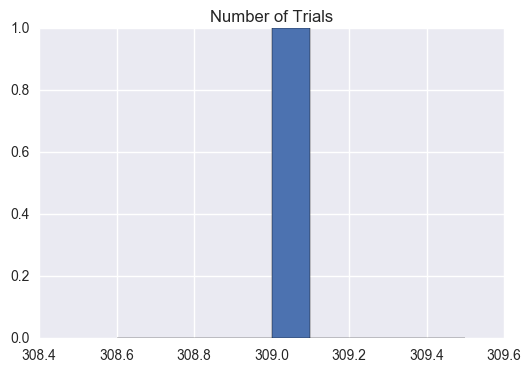

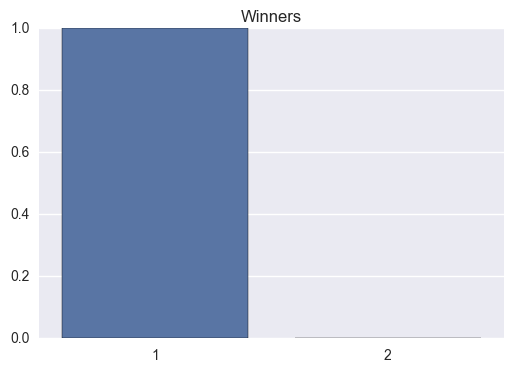

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
l=[]
turns_l=[]
for thing in range(1):
    turns=0
    deck=War()
    p1,p2,p1o,p2o=deck.deal()

    state=True
    while state:
        winner=deck.turn(p1,p2,p1o,p2o)
#         print "P1 Size:",(len(p1.cards)+len(p1o.cards))
#         print "P2 Size:",(len(p2.cards)+len(p2o.cards))
        turns+=1
        if winner>0:
            turns_l.append(turns)
            state=False
    l.append(winner)
plt.hist(turns_l)
plt.title("Number of Trials")
plt.show()
sns.barplot(range(1,3),[l.count(1),l.count(2)])
plt.title("Winners")
plt.show()

## Interlude: SKlearn
You've seen classes before. Think about what happens when you import and fit a model in sklearn. Which of the following are classes, which are methods, and which are attribute variables?
- sklearn.linear_model.LinearRegression
- LinearRegression.fit()
- LinearRegression.predict()
- LinearRegression.score()
- LinearRegression.coef`_`
- LinearRegression.intercept`_`

Can you guess if any of these are inherited classes? You can always look at the source code to see for yourself. Just be careful not to delete anything. 


## Pair Program: Go Fish
Find a partner and write a game class that plays Go Fish against a computer. 

Here are the [rules](http://www.dltk-kids.com/games/go-fish.htm) if you need a refresher.

Remember to think about:
- How you'll deal cards
- What it means to win a game
- How to check if the game has been won or lost
- What happens during each turn


## Further reading

Adapted from *Think Python* (Allen Dowley, 2015), chapters 17 + 18
http://greenteapress.com/thinkpython2/thinkpython2.pdf

Python documentation on classes: https://docs.python.org/2/tutorial/classes.html